In [1]:
!pip install python-pptx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
cd /content/drive/MyDrive/Giraffa Analytics/MRI-Blur-Detection

/content/drive/MyDrive/Giraffa Analytics/MRI-Blur-Detection


In [3]:
#General imports
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(666)

from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint

from pathlib import Path
from datetime import datetime
import json
import os

from Model.DataGenerator import FoldGenerator
from Model.UncompiledModel import get_uncompiled_model
from Model.project_scripts import train_validation_test_split
from Model.project_scripts import model_json_loader
from Model.project_scripts import split_in_folds
from Model.CustomCallbacks import PlottingCallback
from Model.Evaluation import print_model_metrics

In [4]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [5]:
#split_in_folds(5/100, 5)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.58398, saving model to Callbacks/09-08-2022 10:32/model_checkpoint/training/cp-0001.ckpt
65/65 - 149s - loss: 505.1046 - accuracy: 0.5822 - val_loss: 127.5927 - val_accuracy: 0.5840 - 149s/epoch - 2s/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.58398 to 0.62305, saving model to Callbacks/09-08-2022 10:32/model_checkpoint/training/cp-0002.ckpt
65/65 - 135s - loss: 65.6471 - accuracy: 0.7639 - val_loss: 134.6970 - val_accuracy: 0.6230 - 135s/epoch - 2s/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.62305 to 0.63672, saving model to Callbacks/09-08-2022 10:32/model_checkpoint/training/cp-0003.ckpt
65/65 - 134s - loss: 17.0128 - accuracy: 0.8846 - val_loss: 160.7034 - val_accuracy: 0.6367 - 134s/epoch - 2s/step
Epoch 4/10

Epoch 4: val_accuracy improved from 0.63672 to 0.64258, saving model to Callbacks/09-08-2022 10:32/model_checkpoint/training/cp-0004.ckpt
65/65 - 134s - loss: 10.5635 - accuracy: 0.9192 - val_los

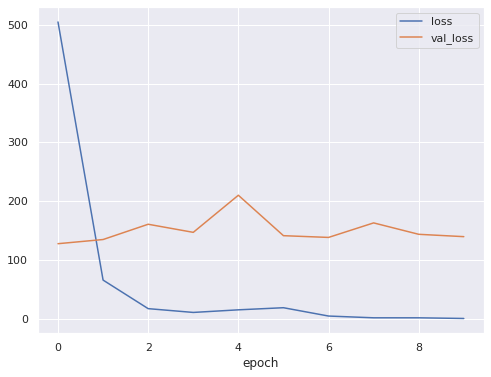

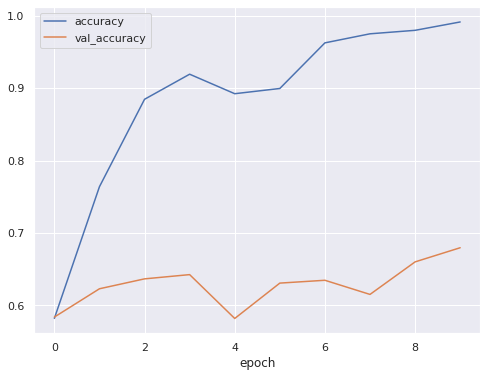

In [ ]:
validation_generator = FoldGenerator(folds=[0])
data_generator = FoldGenerator(folds=[1,2,3,4])
# Design model
#GET MODEL NAME (the name is given by the time it started fitting)
CURRENT_TIME = datetime.now().strftime("%d-%m-%Y %H:%M")

#Create folder for the callbacks
os.mkdir(f'Callbacks/{CURRENT_TIME}')

model = get_uncompiled_model()
#We compile the model
model.compile(
    #change these
    optimizer= optimizer,  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Accuracy()],
)
    
#CALLBACKS
#CSV LOGGER
logger_path = f'Callbacks/{CURRENT_TIME}/training.log'
logger_dir = os.path.dirname(logger_path)
csv_logger = CSVLogger(logger_path, append = False)

#ModelCheckpoint
checkpoint_path = f'Callbacks/{CURRENT_TIME}/model_checkpoint/training/'+'cp-{epoch:04d}.ckpt'
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint')
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint/training')
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

#PlottingCallback --custom callback
loss_acc_plotter = PlottingCallback(f'Callbacks/{CURRENT_TIME}')


#The callbacks will be executed in the order given below
model_callbacks = [csv_logger, model_checkpoint, loss_acc_plotter]
#We fit the model
model.fit(data_generator,
          validation_data=validation_generator,
          verbose=2,
          epochs=10,
          callbacks = model_callbacks
         )

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.50195, saving model to Callbacks/09-08-2022 10:55/model_checkpoint/training/cp-0001.ckpt
65/65 - 136s - loss: 863.1505 - accuracy: 0.6317 - val_loss: 267.7659 - val_accuracy: 0.5020 - 136s/epoch - 2s/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.50195 to 0.54688, saving model to Callbacks/09-08-2022 10:55/model_checkpoint/training/cp-0002.ckpt
65/65 - 134s - loss: 23.9508 - accuracy: 0.8736 - val_loss: 204.6604 - val_accuracy: 0.5469 - 134s/epoch - 2s/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.54688 to 0.54883, saving model to Callbacks/09-08-2022 10:55/model_checkpoint/training/cp-0003.ckpt
65/65 - 133s - loss: 2.5773 - accuracy: 0.9596 - val_loss: 228.9234 - val_accuracy: 0.5488 - 133s/epoch - 2s/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.54883
65/65 - 134s - loss: 1.5669 - accuracy: 0.9774 - val_loss: 248.8217 - val_accuracy: 0.5469 - 134s/epoch - 2s/step
Epoch 5/10

Epoch 5: val_accura

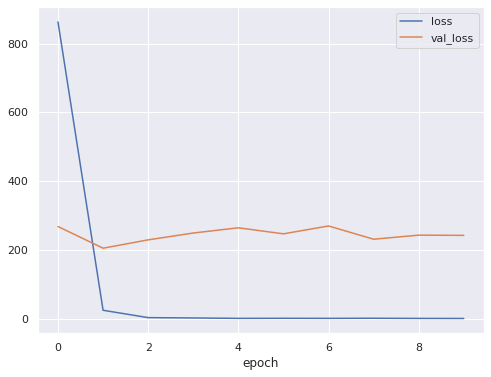

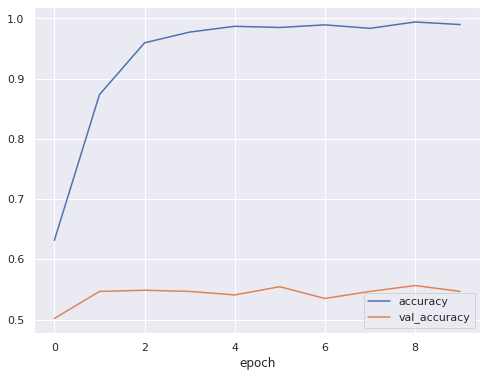

In [ ]:
validation_generator = FoldGenerator(folds=[1])
data_generator = FoldGenerator(folds=[0,2,3,4])
# Design model
#GET MODEL NAME (the name is given by the time it started fitting)
CURRENT_TIME = datetime.now().strftime("%d-%m-%Y %H:%M")

#Create folder for the callbacks
os.mkdir(f'Callbacks/{CURRENT_TIME}')

model = get_uncompiled_model()
model.compile(
    #change these
    optimizer= optimizer,  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Accuracy()],
)
    
#CALLBACKS
#CSV LOGGER
logger_path = f'Callbacks/{CURRENT_TIME}/training.log'
logger_dir = os.path.dirname(logger_path)
csv_logger = CSVLogger(logger_path, append = False)

#ModelCheckpoint
checkpoint_path = f'Callbacks/{CURRENT_TIME}/model_checkpoint/training/'+'cp-{epoch:04d}.ckpt'
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint')
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint/training')
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

#PlottingCallback --custom callback
loss_acc_plotter = PlottingCallback(f'Callbacks/{CURRENT_TIME}')


#The callbacks will be executed in the order given below
model_callbacks = [csv_logger, model_checkpoint, loss_acc_plotter]
#We fit the model
model.fit(data_generator,
          validation_data=validation_generator,
          verbose=2,
          epochs=10,
          callbacks = model_callbacks
         )

In [ ]:
validation_generator = FoldGenerator(folds=[2])
data_generator = FoldGenerator(folds=[0,1,3,4])
# Design model
#GET MODEL NAME (the name is given by the time it started fitting)
CURRENT_TIME = datetime.now().strftime("%d-%m-%Y %H:%M")

#Create folder for the callbacks
os.mkdir(f'Callbacks/{CURRENT_TIME}')

model = get_uncompiled_model()
model.compile(
    #change these
    optimizer= optimizer,  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Accuracy()],
)
    
#CALLBACKS
#CSV LOGGER
logger_path = f'Callbacks/{CURRENT_TIME}/training.log'
logger_dir = os.path.dirname(logger_path)
csv_logger = CSVLogger(logger_path, append = False)

#ModelCheckpoint
checkpoint_path = f'Callbacks/{CURRENT_TIME}/model_checkpoint/training/'+'cp-{epoch:04d}.ckpt'
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint')
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint/training')
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

#PlottingCallback --custom callback
loss_acc_plotter = PlottingCallback(f'Callbacks/{CURRENT_TIME}')


#The callbacks will be executed in the order given below
model_callbacks = [csv_logger, model_checkpoint, loss_acc_plotter]
#We fit the model
model.fit(data_generator,
          validation_data=validation_generator,
          verbose=2,
          epochs=10,
          callbacks = model_callbacks
         )

In [ ]:
validation_generator = FoldGenerator(folds=[3])
data_generator = FoldGenerator(folds=[0,1,2,4])
# Design model
#GET MODEL NAME (the name is given by the time it started fitting)
CURRENT_TIME = datetime.now().strftime("%d-%m-%Y %H:%M")

#Create folder for the callbacks
os.mkdir(f'Callbacks/{CURRENT_TIME}')

model = get_uncompiled_model()
model.compile(
    #change these
    optimizer= optimizer,  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Accuracy()],
)
    
#CALLBACKS
#CSV LOGGER
logger_path = f'Callbacks/{CURRENT_TIME}/training.log'
logger_dir = os.path.dirname(logger_path)
csv_logger = CSVLogger(logger_path, append = False)

#ModelCheckpoint
checkpoint_path = f'Callbacks/{CURRENT_TIME}/model_checkpoint/training/'+'cp-{epoch:04d}.ckpt'
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint')
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint/training')
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

#PlottingCallback --custom callback
loss_acc_plotter = PlottingCallback(f'Callbacks/{CURRENT_TIME}')


#The callbacks will be executed in the order given below
model_callbacks = [csv_logger, model_checkpoint, loss_acc_plotter]
#We fit the model
model.fit(data_generator,
          validation_data=validation_generator,
          verbose=2,
          epochs=10,
          callbacks = model_callbacks
         )

In [ ]:
validation_generator = FoldGenerator(folds=[4])
data_generator = FoldGenerator(folds=[0,1,2,3])
# Design model
#GET MODEL NAME (the name is given by the time it started fitting)
CURRENT_TIME = datetime.now().strftime("%d-%m-%Y %H:%M")

#Create folder for the callbacks
os.mkdir(f'Callbacks/{CURRENT_TIME}')

model = get_uncompiled_model()
model.compile(
    #change these
    optimizer= optimizer,  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Accuracy()],
)
    
#CALLBACKS
#CSV LOGGER
logger_path = f'Callbacks/{CURRENT_TIME}/training.log'
logger_dir = os.path.dirname(logger_path)
csv_logger = CSVLogger(logger_path, append = False)

#ModelCheckpoint
checkpoint_path = f'Callbacks/{CURRENT_TIME}/model_checkpoint/training/'+'cp-{epoch:04d}.ckpt'
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint')
os.mkdir(f'Callbacks/{CURRENT_TIME}/model_checkpoint/training')
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

#PlottingCallback --custom callback
loss_acc_plotter = PlottingCallback(f'Callbacks/{CURRENT_TIME}')


#The callbacks will be executed in the order given below
model_callbacks = [csv_logger, model_checkpoint, loss_acc_plotter]
#We fit the model
model.fit(data_generator,
          validation_data=validation_generator,
          verbose=2,
          epochs=10,
          callbacks = model_callbacks
         )